# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
#Task 1 – Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
#Task 2 – Generate random data for the social media data
Categories=["Health","Fitness","Fashion","Movies","Music","culture","Family"]
Categories

['Health', 'Fitness', 'Fashion', 'Movies', 'Music', 'culture', 'Family']

In [3]:
data = {'Date': pd.date_range('2021-01-01', periods=500),'Category': [random.choice(Categories) for _ in range(500)],'Likes':np.random.randint(0, 10000, size=500)}

In [4]:
#Task 3 – Load the data into a Pandas DataFrame and Explore the data
data=pd.DataFrame(data)

In [5]:
data.head()

,Date,Category,Likes
0,2021-01-01,Fitness,3943
1,2021-01-02,Fashion,8701
2,2021-01-03,Movies,1723
3,2021-01-04,culture,2317
4,2021-01-05,Fashion,4651


In [6]:
data.tail()

,Date,Category,Likes
495,2022-05-11,Fitness,3605
496,2022-05-12,culture,7969
497,2022-05-13,Fashion,830
498,2022-05-14,Fitness,9528
499,2022-05-15,Music,1185


In [7]:
data["Category"].count()

500

In [8]:
data.groupby("Category").count()

,Date,Likes
Category,,
Family,61,61
Fashion,78,78
Fitness,72,72
Health,70,70
Movies,76,76
Music,79,79
culture,64,64


In [9]:
#Task 4 – Clean the data
data_new=data.dropna()

In [10]:
data.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

In [11]:
data.drop_duplicates()

,Date,Category,Likes
0,2021-01-01,Fitness,3943
1,2021-01-02,Fashion,8701
2,2021-01-03,Movies,1723
3,2021-01-04,culture,2317
4,2021-01-05,Fashion,4651
...,...,...,...
495,2022-05-11,Fitness,3605
496,2022-05-12,culture,7969
497,2022-05-13,Fashion,830
498,2022-05-14,Fitness,9528


In [12]:
data['Date']=pd.to_datetime(data['Date'])

In [13]:
data.dtypes

Date        datetime64[ns]
Category            object
Likes                int64
dtype: object

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


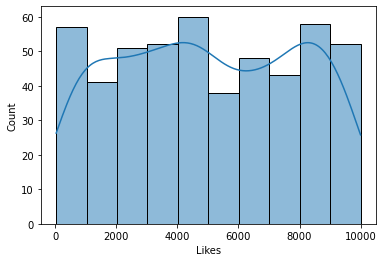

In [14]:
#Task 5– Visualize and Analyze the data
!pip install --upgrade seaborn
sns.histplot(data=data,x="Likes",kde=True)

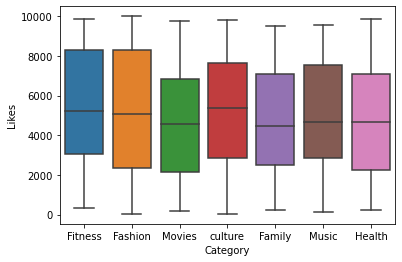

In [23]:
sns.boxplot(data=data,x="Category",y="Likes")

In [ ]:
data['Likes'].mean()

In [24]:
data.groupby(['Category'])['Likes'].mean()

Category
Family     4663.524590
Fashion    5318.115385
Fitness    5466.625000
Health     4810.914286
Movies     4622.855263
Music      5020.556962
culture    5219.687500
Name: Likes, dtype: float64

In [26]:
data.groupby(['Category'])['Likes'].sum().idxmax()

'Fashion'

In [41]:
data_1=(data.groupby(['Category'])['Likes'].sum()/data['Likes'].sum())*100

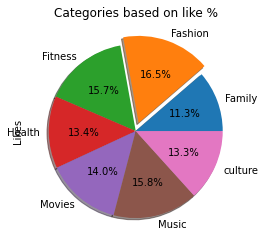

In [43]:
plot = data_1.plot.pie(y='Likes', title="Categories based on like %", legend=False, \
                   autopct='%1.1f%%', explode=(0,0.1,0,0,0,0,0), \
                   shadow=True, startangle=0)

In [25]:
data.groupby(['Category'])['Likes'].sum().idxmin()

'Family'

In [27]:
data.groupby(['Date','Category'])['Likes'].sum()

Date        Category
2021-01-01  Fitness     3943
2021-01-02  Fashion     8701
2021-01-03  Movies      1723
2021-01-04  culture     2317
2021-01-05  Fashion     4651
                        ... 
2022-05-11  Fitness     3605
2022-05-12  culture     7969
2022-05-13  Fashion      830
2022-05-14  Fitness     9528
2022-05-15  Music       1185
Name: Likes, Length: 500, dtype: int64

In [50]:
data.groupby(['Date'])['Likes'].sum().idxmax()

Timestamp('2021-11-13 00:00:00')

In [52]:
data.groupby(['Category'])['Date'].count()

Category
Family     61
Fashion    78
Fitness    72
Health     70
Movies     76
Music      79
culture    64
Name: Date, dtype: int64

In [55]:
data_2=(data.groupby(['Category'])['Date'].count()/data['Date'].count())*100

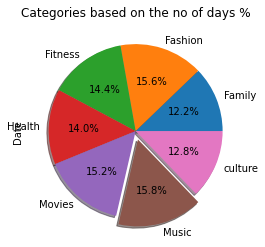

In [59]:
plot = data_2.plot.pie(y='Category', title="Categories based on the no of days %", legend=False, \
                   autopct='%1.1f%%', explode=(0,0,0,0,0,0.1,0), \
                   shadow=True, startangle=0)

In [ ]:
#conclusion
#1.The average likes are higher in Fitness category and the lowest in the culture category
#2.The Fitness category has the maximum number of likes
#3.The Family category has the minimum number of likes 
#4.culture and Heath has almost the same percentage of likes
#5.One the basis of number of days the music has the higher numbers